# Problem Statement: Life Insurance Data

## The dataset belongs to a leading life insurance company. The company wants to predict the bonus for its agents so that it may design appropriate engagement activity for their high  performing agents and upskill programs for low performing agents.

### Step -1 . Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [149]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [150]:
df = pd.read_excel("Sales.xlsx", sheet_name='Sales')
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [151]:
df.shape

(4520, 20)

In [152]:
print("Data has ", df.shape[0]," rows and  ",df.shape[1]," columns ")

Data has  4520  rows and   20  columns 


In [153]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,4520.0,NaN,NaN,NaN,7002259.5,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,NaN,NaN,NaN,4077.838274,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,NaN,NaN,NaN,14.494707,9.037629,2.0,7.0,13.0,20.0,58.0
CustTenure,4294.0,NaN,NaN,NaN,14.469027,8.963671,2.0,7.0,13.0,20.0,57.0
Channel,4520,3,Agent,3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,4520,5,Salaried,2192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField,4520,7,Graduate,1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4520,3,Male,2688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExistingProdType,4520.0,NaN,NaN,NaN,3.688938,1.015769,1.0,3.0,4.0,4.0,6.0
Designation,4520,6,Manager,1620,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

Correcting Messy Column names

In [155]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[','').str.replace(']','').str.replace('-','_').str.replace('.','')

In [156]:
#Checking Null Value
df.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

Table have NULL values in the "depth" field, which needs to be impoted.

In [157]:
df.isnull().sum().sum()

1166

In [158]:
df.size

90400

#### there are total 1166 NULL records out of total 90400 records

### NULL Treatment one by one for each NULL field

In [159]:
df.Age.isnull().sum()

269

In [160]:
df.Age = np.where( df.Age.isnull(), df.CustTenure, df.Age)
df.Age = np.where( df.Age.isnull(), df.ExistingPolicyTenure , df.Age)

### Similarly if Cust tenure is NULL, replace it with existing Policy Tenure or Customer Age 

In [161]:
df.CustTenure.isnull()

0       False
1       False
2       False
3        True
4        True
        ...  
4515    False
4516    False
4517    False
4518    False
4519    False
Name: CustTenure, Length: 4520, dtype: bool

In [162]:
df.CustTenure.isnull().sum()

226

In [163]:
df.CustTenure = np.where( df.CustTenure.isnull(), df.ExistingPolicyTenure , df.CustTenure)
df.CustTenure = np.where( df.CustTenure.isnull(), df.Age, df.CustTenure)

In [164]:
df.CustTenure.isnull().sum()

0

### Similarly if Cust Existing Policy tenure is NULL, replace it with existing Policy Tenure or Customer Age 

In [165]:
df.ExistingPolicyTenure.isnull().sum()

184

In [166]:
df.ExistingPolicyTenure = np.where( df.ExistingPolicyTenure.isnull(), df.CustTenure , df.ExistingPolicyTenure)
df.ExistingPolicyTenure = np.where( df.ExistingPolicyTenure.isnull(), df.Age, df.ExistingPolicyTenure)

In [167]:
df.ExistingPolicyTenure.isnull().sum()

0

### Treating NULL  for Number of Policies 
### Best way to Treat this field is to replace NULL with Mode

In [168]:
df.NumberOfPolicy.isnull().sum()

45

In [169]:
mode = df.NumberOfPolicy.mode()[0]
df.NumberOfPolicy = df.NumberOfPolicy.fillna(mode)

In [170]:
df.NumberOfPolicy.isnull().sum()

0

### Treating NULL  for "MonthlyIncome", "CustCareScore"  and "SumAssured"
### Best way to Treat this field is to replace NULL with Median

In [171]:
df.MonthlyIncome.isnull().sum()

236

In [172]:
df.SumAssured.isnull().sum()

154

In [173]:
df.MonthlyIncome.fillna(int(df.MonthlyIncome.median()), inplace=True)

In [174]:
df.SumAssured.fillna(int(df.SumAssured.median()), inplace=True)

In [175]:
df.MonthlyIncome.isnull().sum()

0

In [176]:
df.SumAssured.isnull().sum()

0

In [177]:
df.CustCareScore.isnull().sum()

52

In [178]:
df.CustCareScore.fillna(int(df.CustCareScore.median()), inplace=True)

In [179]:
df.CustCareScore.isnull().sum()

0

In [180]:
df.isnull().sum().sum()

0

### We have treated all NULL values

### Check for the Duplicate Customer IDs in Sample data

In [181]:
df.CustID.duplicated().sum()

0

# Univariate Analysis

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4520 non-null   float64
 3   CustTenure            4520 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4520 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4520 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4520 non-null   float64
 15  SumAssured           

### Convert "MonthlyIncome" , "SumAssured" to Numeric Format

In [183]:
df['MonthlyIncome'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0       20993.0
1       20130.0
2       17090.0
3       17909.0
4       18468.0
         ...   
4515    26355.0
4516    20991.0
4517    21606.0
4518    20068.0
4519    23820.0
Name: MonthlyIncome, Length: 4520, dtype: float64>

In [184]:
df['MonthlyIncome'] = df['MonthlyIncome'].astype(int)

In [185]:
df['SumAssured'] = df['SumAssured'].astype(int)

### Taking counts for each Categorical fields 

In [186]:
#Finding unique values for categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        print("Field name is ", column.upper(),': and Count for this categories are ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n\n')
        

Field name is  CHANNEL : and Count for this categories are  3
Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64



Field name is  OCCUPATION : and Count for this categories are  5
Free Lancer           2
Laarge Business     153
Large Business      255
Small Business     1918
Salaried           2192
Name: Occupation, dtype: int64



Field name is  EDUCATIONFIELD : and Count for this categories are  7
MBA                 74
UG                 230
Post Graduate      252
Engineer           408
Diploma            496
Under Graduate    1190
Graduate          1870
Name: EducationField, dtype: int64



Field name is  GENDER : and Count for this categories are  3
Fe male     325
Female     1507
Male       2688
Name: Gender, dtype: int64



Field name is  DESIGNATION : and Count for this categories are  6
Exe                127
VP                 226
AVP                336
Senior Manager     676
Executive         1535
Manager         

### Merge similar categoriccal values as mentioned above in Insights 

In [187]:
print(df.EducationField.value_counts())
print(df.Gender.value_counts())
print(df.Occupation.value_counts())
print(df.Designation.value_counts())

Graduate          1870
Under Graduate    1190
Diploma            496
Engineer           408
Post Graduate      252
UG                 230
MBA                 74
Name: EducationField, dtype: int64
Male       2688
Female     1507
Fe male     325
Name: Gender, dtype: int64
Salaried           2192
Small Business     1918
Large Business      255
Laarge Business     153
Free Lancer           2
Name: Occupation, dtype: int64
Manager           1620
Executive         1535
Senior Manager     676
AVP                336
VP                 226
Exe                127
Name: Designation, dtype: int64


In [188]:
df.EducationField = np.where(df.EducationField=="UG","Under Graduate",df.EducationField)
df.Gender = np.where(df.Gender=="Fe male","Female",df.Gender)
df.Occupation = np.where(df.Occupation=="Laarge Business","Large Business",df.Occupation)
df.Designation = np.where(df.Designation=="Exe","Executive",df.Designation)

In [189]:
#Finding unique values for categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        print("Field name is ", column.upper(),': and Count for this categories are ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n\n')

Field name is  CHANNEL : and Count for this categories are  3
Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64



Field name is  OCCUPATION : and Count for this categories are  4
Free Lancer          2
Large Business     408
Small Business    1918
Salaried          2192
Name: Occupation, dtype: int64



Field name is  EDUCATIONFIELD : and Count for this categories are  6
MBA                 74
Post Graduate      252
Engineer           408
Diploma            496
Under Graduate    1420
Graduate          1870
Name: EducationField, dtype: int64



Field name is  GENDER : and Count for this categories are  2
Female    1832
Male      2688
Name: Gender, dtype: int64



Field name is  DESIGNATION : and Count for this categories are  5
VP                 226
AVP                336
Senior Manager     676
Manager           1620
Executive         1662
Name: Designation, dtype: int64



Field name is  MARITALSTATUS : and Count for this 

In [190]:
df2=df.drop('CustID', axis=1)

Index(['AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')


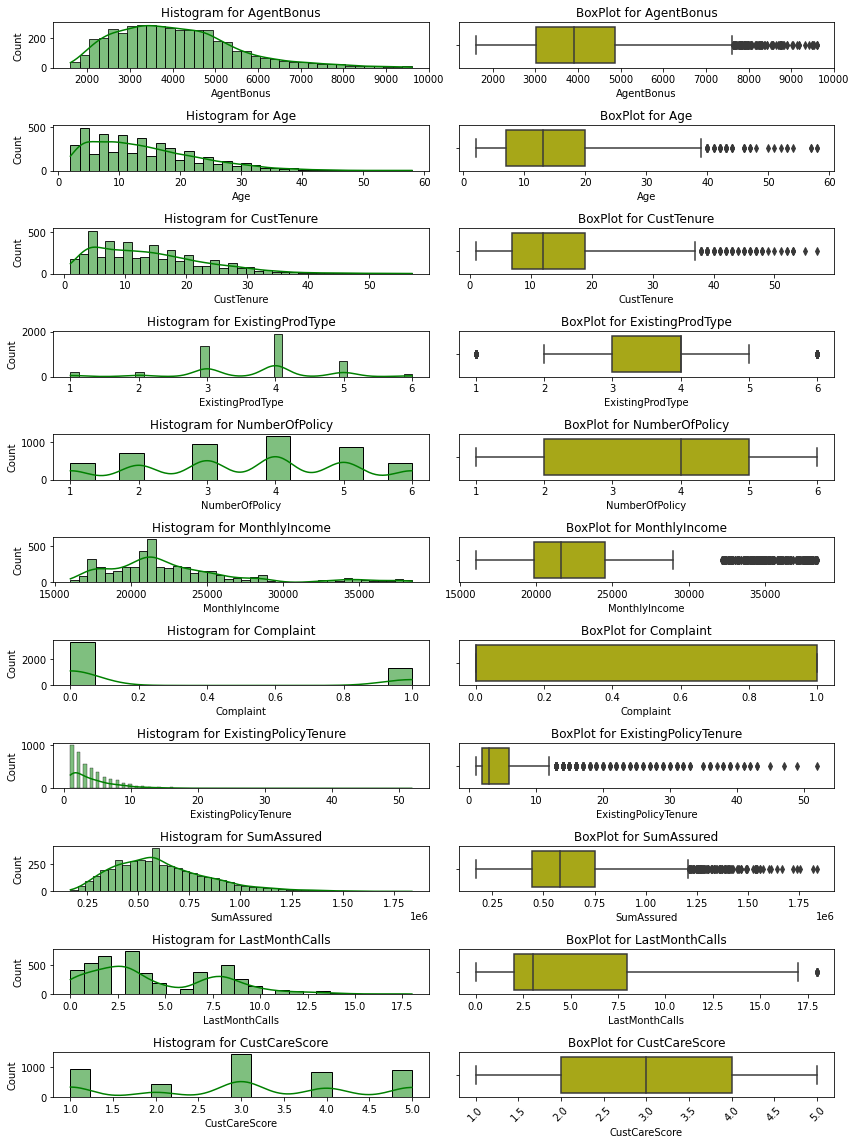

In [191]:
col_list=df2.columns
print(col_list)

fig, axes = plt.subplots(nrows=11,ncols=2)
fig.set_size_inches(12,16)
x=0
y=0
for i in df2.select_dtypes(include='number'):
        ax_hist=sns.histplot(x=df2[i], kde=True, ax=axes[x][y], color='g')
        ax_box=sns.boxplot(x=df2[i], data=df2, ax=axes[x][y+1], color='y')
        plt.xticks(rotation=45)
        ax_hist.set(xlabel=i,title='Histogram for '+i)
        ax_box.set(xlabel=i,title='BoxPlot for '+i)
        plt.tight_layout()
        x=x+1

In [192]:
##Check for Skewness of the data:
df2.skew()

AgentBonus              0.822348
Age                     0.960101
CustTenure              0.928995
ExistingProdType       -0.401100
NumberOfPolicy         -0.108161
MonthlyIncome           1.434315
Complaint               0.941129
ExistingPolicyTenure    3.440053
SumAssured              1.002018
LastMonthCalls          0.810417
CustCareScore          -0.138120
dtype: float64

## Bivariate Analysis

#### Biveriate analysis of all other fields, with repect to Agent Bonus, and take Mean, Counts and Sum of Categorical fields

In [194]:
#Finding unique values for categorical variables
for column in df2.select_dtypes(include='object'):
    print("Field name is ", column.upper(),': and Distinct Count for this Column is ',df2[column].nunique())
    print("Field name is ", column.upper(),': and it\'s distinct  categories are ',df2[column].unique(), end='\n')
    print('Counts are each categories of this column are : \n',df2[column].value_counts().sort_values(),end='\n\n')
    print('Average AgentBonus for each categories of this Column are: ',df2.groupby(column)['AgentBonus'].mean('AgentBonus').sort_values(),end='\n\n')
    print('Total sum value of AgentBonus for each category for Column are : ',df2.groupby(column)['AgentBonus'].sum('AgentBonus').sort_values(),end='\n\n')
    print('\n\n')

Field name is  CHANNEL : and Distinct Count for this Column is  3
Field name is  CHANNEL : and it's distinct  categories are  ['Agent' 'Third Party Partner' 'Online']
Counts are each categories of this column are : 
 Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64

Average AgentBonus for each categories of this Column are:  Channel
Third Party Partner    3963.020979
Agent                  4104.716656
Online                 4104.897436
Name: AgentBonus, dtype: float64

Total sum value of AgentBonus for each category for Column are :  Channel
Online                  1921092
Third Party Partner     3400272
Agent                  13110465
Name: AgentBonus, dtype: int64




Field name is  OCCUPATION : and Distinct Count for this Column is  4
Field name is  OCCUPATION : and it's distinct  categories are  ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Counts are each categories of this column are : 
 Free Lancer    

Index(['AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')


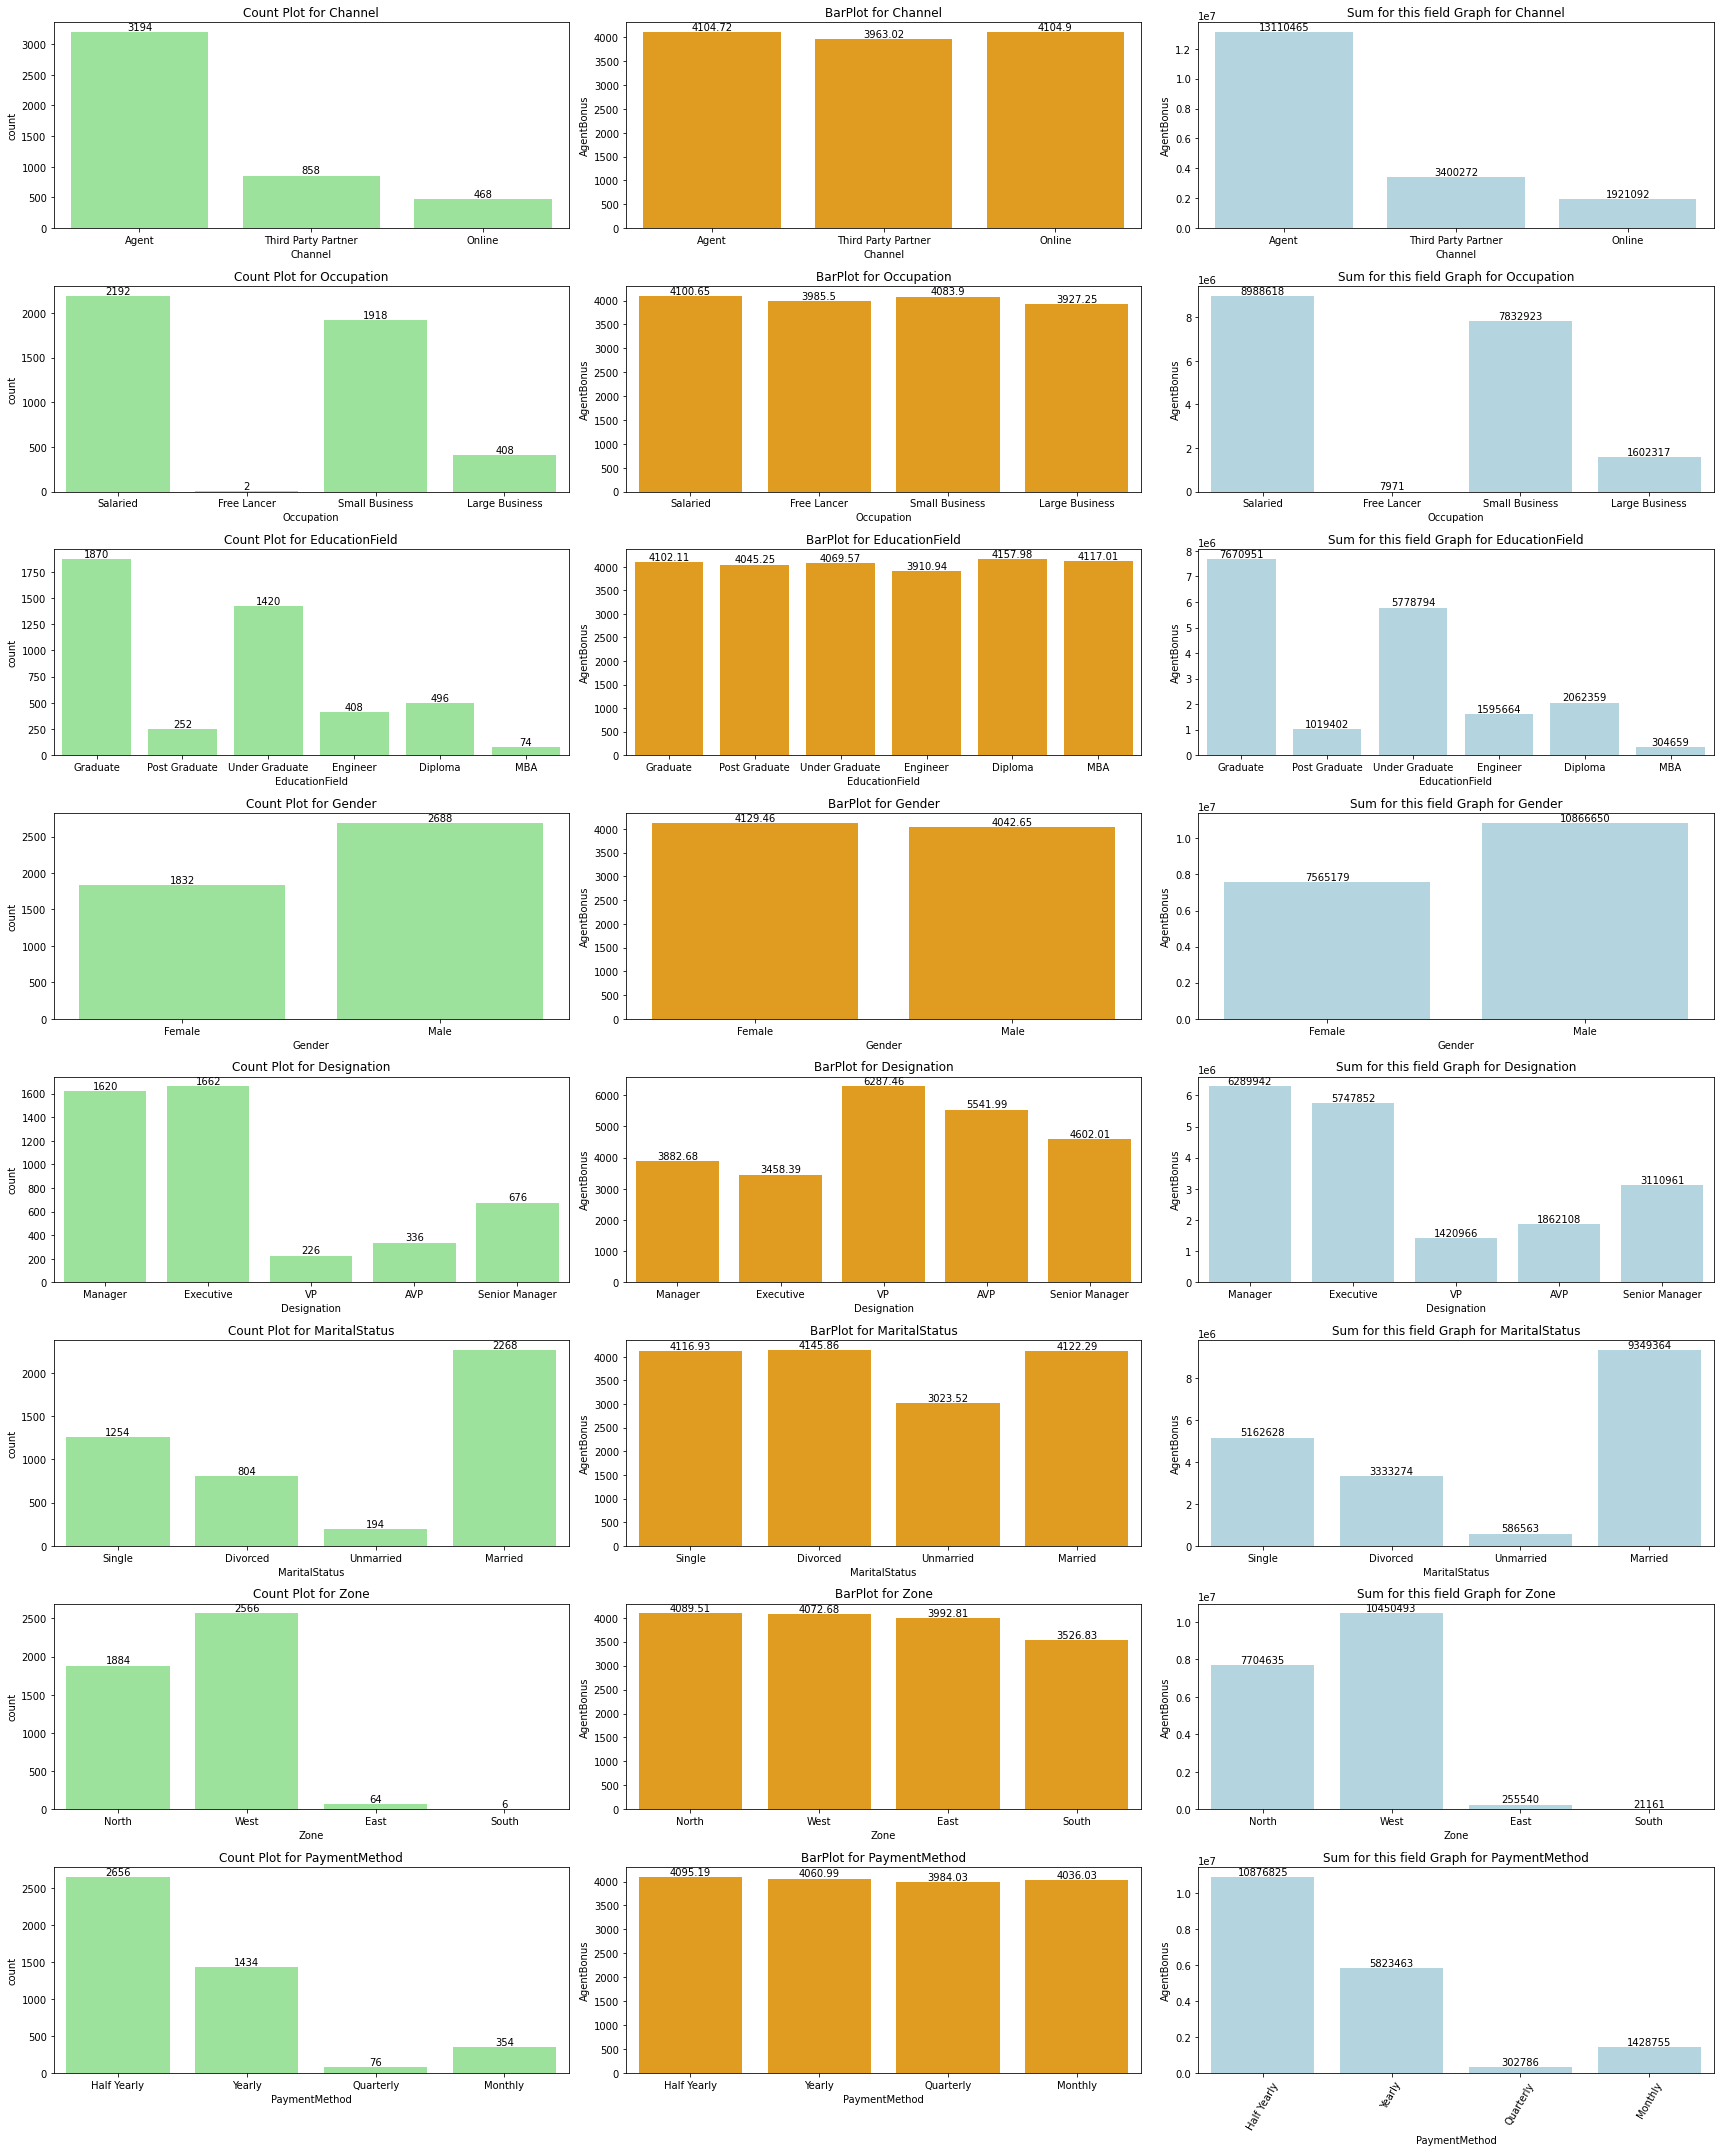

In [195]:
col_list=df2.columns
print(col_list)

fig, axes = plt.subplots(nrows=8,ncols=3)
fig.set_size_inches(24,30)
x=0
y=0
for i in df2.select_dtypes(include='object'):
        ax_count=sns.countplot(data=df2, ax=axes[x][y], x=i, color='lightgreen', orient='v' ) ##color='g'
        ax_count.set(xlabel=i,title='Count Plot for '+i)
        plt.xticks(rotation=60)
        for container in ax_count.containers:
            ax_count.bar_label(container)
        ax_bar=sns.barplot(data = df2, x=i, y='AgentBonus', ax=axes[x][y+1] , color='orange', ci=0.1, orient='v')
        ax_bar.set(xlabel=i,title='BarPlot for '+i)
        plt.xticks(rotation=60)
        for container in ax_bar.containers:
            ax_bar.bar_label(container)
        ax_sum_var=sns.barplot(data = df2, x=i, y='AgentBonus', ax=axes[x][y+2] , estimator=sum, color='lightblue', ci=0.1, orient='v')
        ax_sum_var.set(xlabel=i,title='Sum for this field Graph for '+i)
        plt.xticks(rotation=60)
        for container in ax_sum_var.containers:
            #ax_sum_var.bar_label(container)
            ax_sum_var.bar_label(ax_sum_var.containers[0], fmt='%.0f')
        plt.tight_layout()
        x=x+1

#### We have ploted Counts, Mean and Sum for Agent Bonus against each categorical field of sample data

## Multivariate Analysis

<Figure size 720x720 with 0 Axes>

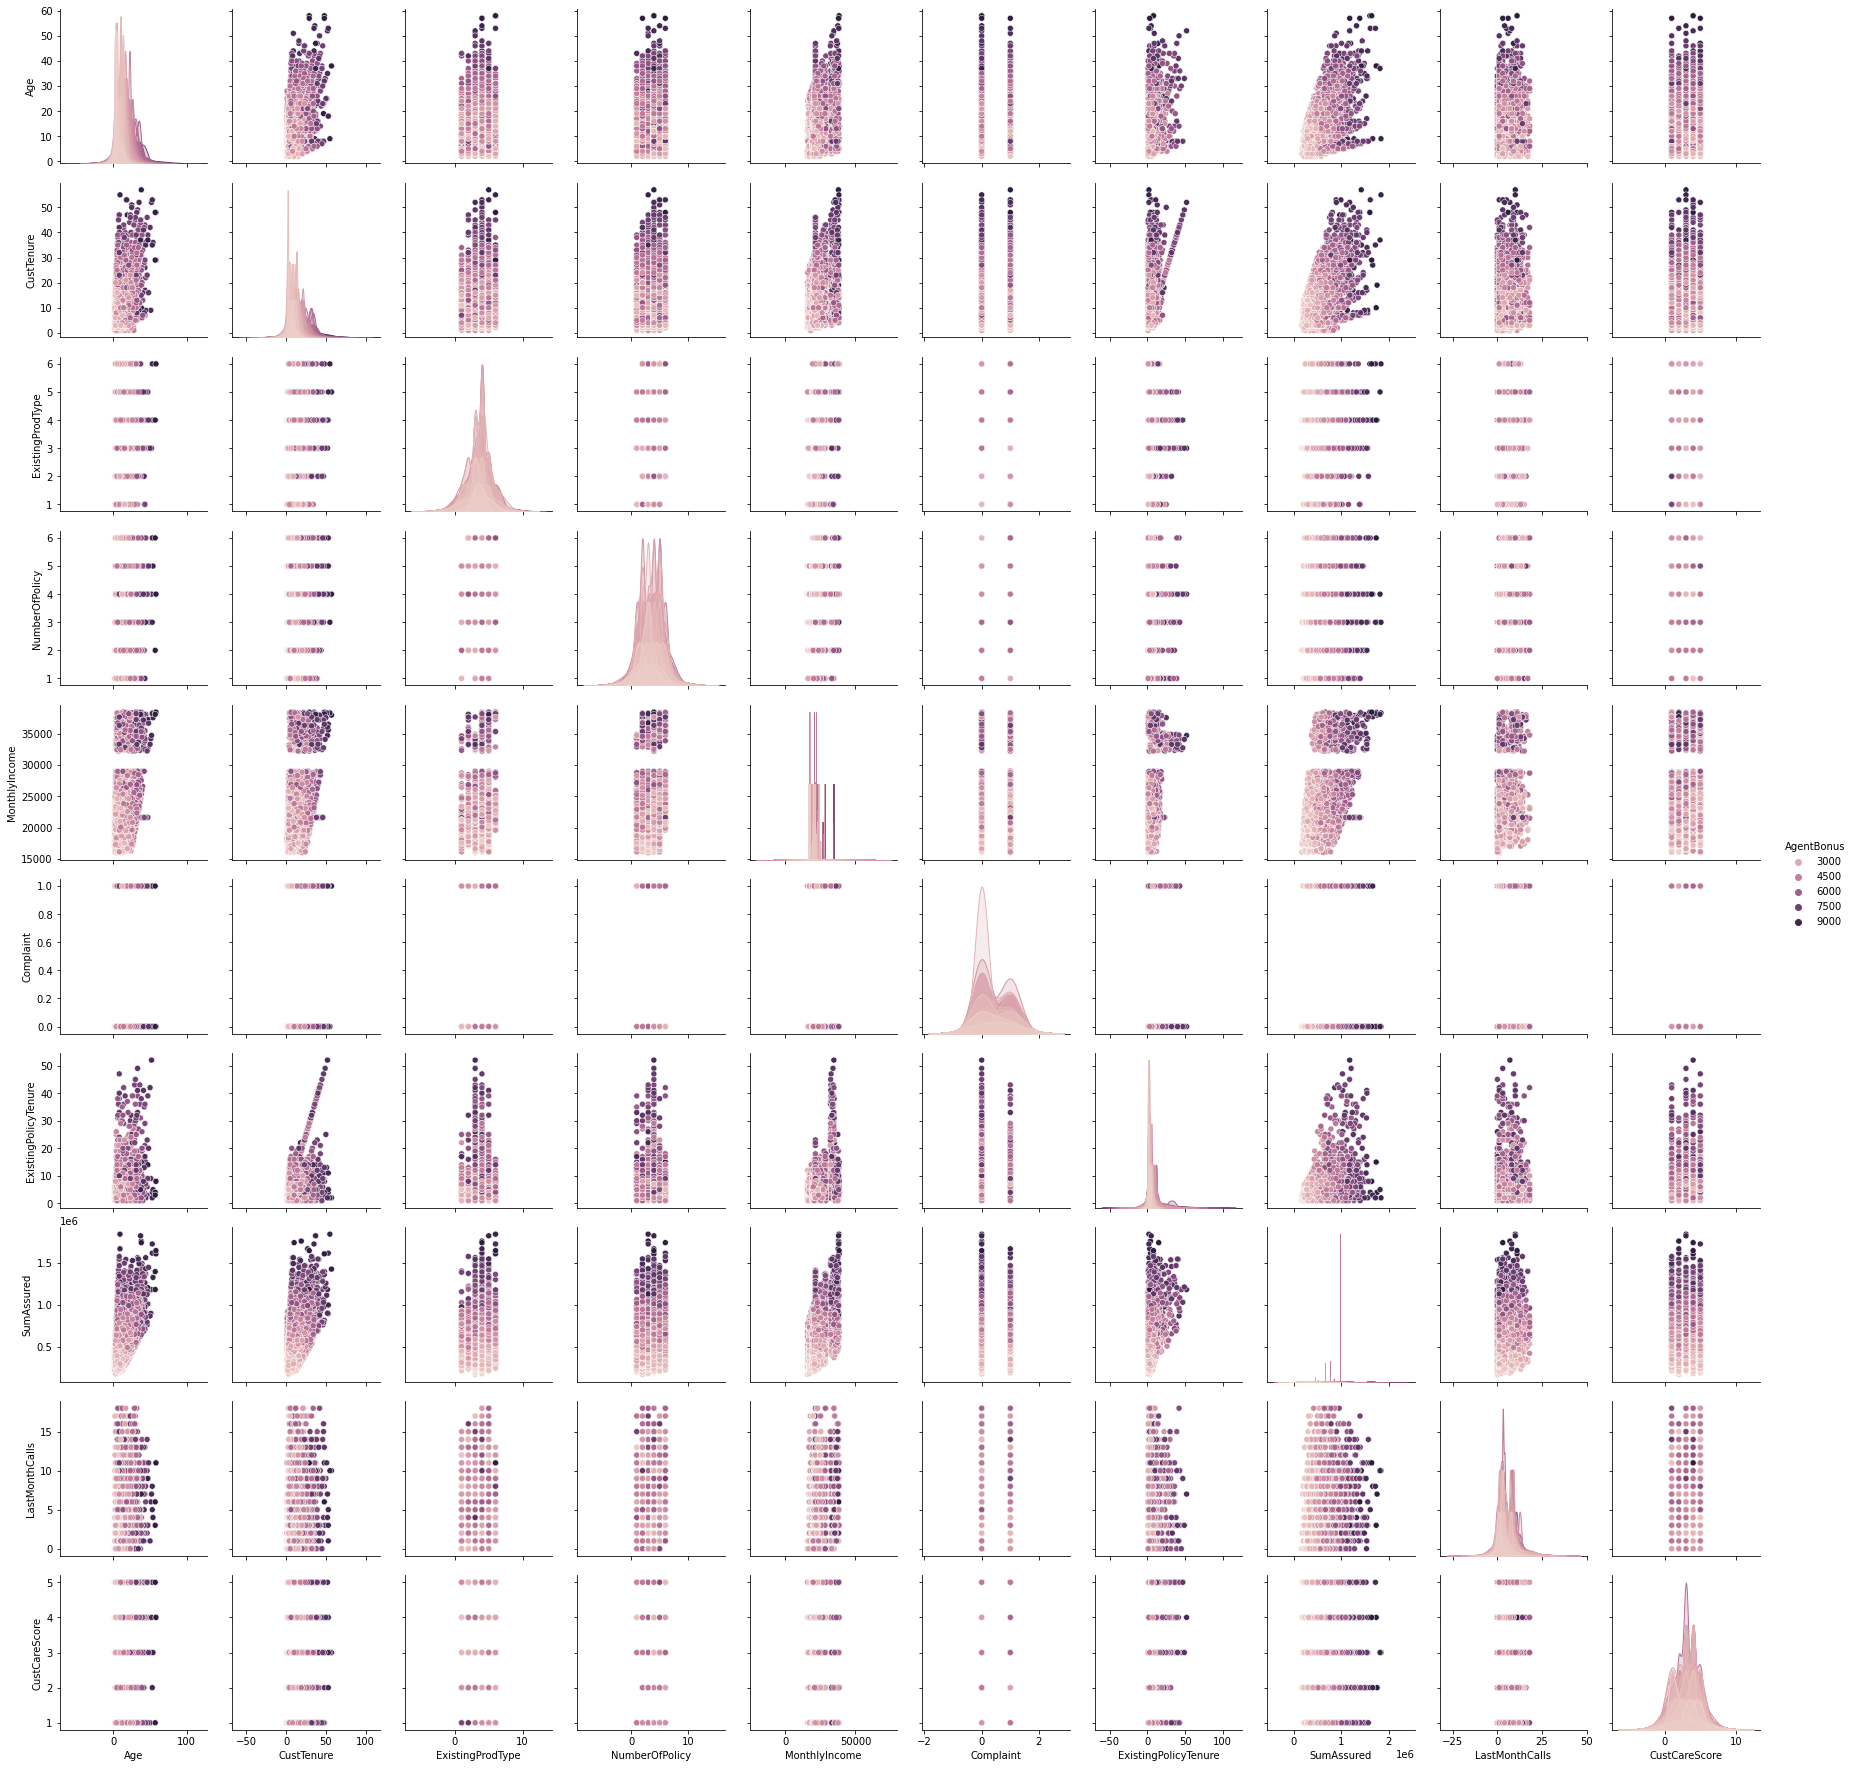

In [196]:
plt.figure(figsize=(10,10))
## sns.pairplot(data=df2, diag_kind='kde',hue = 'AgentBonus');
sns.pairplot(data=df2.select_dtypes(include='number'),  hue="AgentBonus")

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'AgentBonus'),
  Text(1.5, 0, 'Age'),
  Text(2.5, 0, 'CustTenure'),
  Text(3.5, 0, 'ExistingProdType'),
  Text(4.5, 0, 'NumberOfPolicy'),
  Text(5.5, 0, 'MonthlyIncome'),
  Text(6.5, 0, 'Complaint'),
  Text(7.5, 0, 'ExistingPolicyTenure'),
  Text(8.5, 0, 'SumAssured'),
  Text(9.5, 0, 'LastMonthCalls'),
  Text(10.5, 0, 'CustCareScore')])

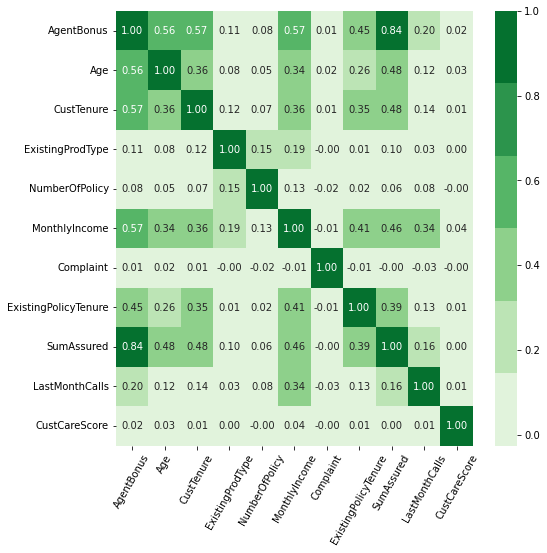

In [197]:
## Heat Map for all Numeric Fields
plt.figure(figsize=(8,8))
colormap = sns.color_palette("Greens")
sns.heatmap(df2.corr(),annot=True,fmt=".2f",cmap=colormap);
plt.xticks(rotation=60)

In [198]:
df2.corr().T

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
AgentBonus,1.000000,0.564699,0.570038,0.113023,0.079266,0.566688,0.014281,0.446945,0.844920,0.199708,0.023192
Age,0.564699,1.000000,0.359631,0.076609,0.053143,0.340516,0.019496,0.263640,0.479793,0.123837,0.029853
CustTenure,0.570038,0.359631,1.000000,0.115561,0.066859,0.359262,0.006850,0.347473,0.483715,0.142982,0.013919
ExistingProdType,0.113023,0.076609,0.115561,1.000000,0.149862,0.190571,-0.003486,0.009800,0.103697,0.033191,0.004110
NumberOfPolicy,0.079266,0.053143,0.066859,0.149862,1.000000,0.133535,-0.016014,0.021839,0.063781,0.075138,-0.001005
MonthlyIncome,0.566688,0.340516,0.359262,0.190571,0.133535,1.000000,-0.005197,0.406739,0.460657,0.337420,0.035621
Complaint,0.014281,0.019496,0.006850,-0.003486,-0.016014,-0.005197,1.000000,-0.005082,-0.000150,-0.026320,-0.003814
ExistingPolicyTenure,0.446945,0.263640,0.347473,0.009800,0.021839,0.406739,-0.005082,1.000000,0.386811,0.126951,0.013532
SumAssured,0.844920,0.479793,0.483715,0.103697,0.063781,0.460657,-0.000150,0.386811,1.000000,0.157970,0.003327
LastMonthCalls,0.199708,0.123837,0.142982,0.033191,0.075138,0.337420,-0.026320,0.126951,0.157970,1.000000,0.006386


## 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

### Data Encoding:

In [203]:
df3=df2.copy()

In [204]:
for col in df3.columns: 
    if df3[col].dtype == 'object': 
        print('\n')
        print('Columns is :',col)
        print(pd.Categorical(df3[col].unique()))
        print(pd.Categorical(df3[col].unique()).codes)
        df3[col] = pd.Categorical(df3[col]).codes



Columns is : Channel
['Agent', 'Third Party Partner', 'Online']
Categories (3, object): ['Agent', 'Online', 'Third Party Partner']
[0 2 1]


Columns is : Occupation
['Salaried', 'Free Lancer', 'Small Business', 'Large Business']
Categories (4, object): ['Free Lancer', 'Large Business', 'Salaried', 'Small Business']
[2 0 3 1]


Columns is : EducationField
['Graduate', 'Post Graduate', 'Under Graduate', 'Engineer', 'Diploma', 'MBA']
Categories (6, object): ['Diploma', 'Engineer', 'Graduate', 'MBA', 'Post Graduate', 'Under Graduate']
[2 4 5 1 0 3]


Columns is : Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
[0 1]


Columns is : Designation
['Manager', 'Executive', 'VP', 'AVP', 'Senior Manager']
Categories (5, object): ['AVP', 'Executive', 'Manager', 'Senior Manager', 'VP']
[2 1 4 0 3]


Columns is : MaritalStatus
['Single', 'Divorced', 'Unmarried', 'Married']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Unmarried']
[2 0 3 1]


Columns is : Zone
['Nor

In [205]:
df2.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993,1,2.0,806761,North,Half Yearly,5,2.0
1,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130,0,3.0,294502,North,Yearly,7,3.0
2,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Executive,3.0,Unmarried,17090,1,2.0,578976,North,Yearly,0,3.0
3,1791,11.0,2.0,Third Party Partner,Salaried,Graduate,Female,3,Executive,3.0,Divorced,17909,1,2.0,268635,West,Half Yearly,0,5.0
4,2955,6.0,4.0,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Divorced,18468,0,4.0,366405,West,Half Yearly,2,5.0


In [206]:
df3.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,0,2,2,0,3,2,2.0,2,20993,1,2.0,806761,1,0,5,2.0
1,2214,11.0,2.0,2,2,2,1,4,2,4.0,0,20130,0,3.0,294502,1,3,7,3.0
2,4273,26.0,4.0,0,0,4,1,4,1,3.0,3,17090,1,2.0,578976,1,3,0,3.0
3,1791,11.0,2.0,2,2,2,0,3,1,3.0,0,17909,1,2.0,268635,3,0,0,5.0
4,2955,6.0,4.0,0,3,5,1,3,1,4.0,0,18468,0,4.0,366405,3,0,2,5.0


In [207]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4520 non-null   float64
 2   CustTenure            4520 non-null   float64
 3   Channel               4520 non-null   int8   
 4   Occupation            4520 non-null   int8   
 5   EducationField        4520 non-null   int8   
 6   Gender                4520 non-null   int8   
 7   ExistingProdType      4520 non-null   int64  
 8   Designation           4520 non-null   int8   
 9   NumberOfPolicy        4520 non-null   float64
 10  MaritalStatus         4520 non-null   int8   
 11  MonthlyIncome         4520 non-null   int32  
 12  Complaint             4520 non-null   int64  
 13  ExistingPolicyTenure  4520 non-null   float64
 14  SumAssured            4520 non-null   int32  
 15  Zone                 

In [209]:
df3.columns

Index(['AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

### Data Split: Split the data into train and test (70:30)

In [239]:
## Create one more Duplicate data set , in case anything goes wrong while Splitting the data set
df_new=df3.copy()

In [240]:
X = df_new.drop('AgentBonus', axis=1)
y = df_new[['AgentBonus']]

In [241]:
X.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,22.0,4.0,0,2,2,0,3,2,2.0,2,20993,1,2.0,806761,1,0,5,2.0
1,11.0,2.0,2,2,2,1,4,2,4.0,0,20130,0,3.0,294502,1,3,7,3.0
2,26.0,4.0,0,0,4,1,4,1,3.0,3,17090,1,2.0,578976,1,3,0,3.0
3,11.0,2.0,2,2,2,0,3,1,3.0,0,17909,1,2.0,268635,3,0,0,5.0
4,6.0,4.0,0,3,5,1,3,1,4.0,0,18468,0,4.0,366405,3,0,2,5.0


In [242]:
y.head()

,AgentBonus
0,4409
1,2214
2,4273
3,1791
4,2955


In [243]:
#Train and test split of X and y in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [244]:
X_train.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
2461,12.0,16.0,2,1,1,1,4,1,3.0,2,20742,1,4.0,480800,3,0,1,4.0
3681,31.0,15.0,0,3,5,1,4,2,5.0,1,23398,0,4.0,617707,3,0,2,4.0
1309,15.0,6.0,0,2,2,1,3,1,1.0,2,16232,0,6.0,453360,1,0,0,5.0
4254,5.0,16.0,1,1,1,1,4,2,2.0,1,23536,0,1.0,282197,3,0,8,3.0
1335,8.0,17.0,0,2,2,1,1,1,1.0,1,17269,0,6.0,750165,3,1,1,5.0


In [245]:
print('Shape for X_train is ',X_train.shape)
print('Shape for X_test is ',X_test.shape)
print('Shape for y_train is ',y_train.shape)
print('Shape for y_test is ',y_test.shape)

Shape for X_train is  (3164, 18)
Shape for X_test is  (1356, 18)
Shape for y_train is  (3164, 1)
Shape for y_test is  (1356, 1)


### Perform checks for significant variables using appropriate method from statsmodel

In [246]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [247]:
# As further deep dive, explore coefficients for each of the independent attributes
for id, col in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col, regression_model.coef_[0][id]))

The coefficient for Age is 23.010129308348855
The coefficient for CustTenure is 21.75324057376167
The coefficient for Channel is 7.244983859906801
The coefficient for Occupation is -5.783683961645124
The coefficient for EducationField is -2.196147569052043
The coefficient for Gender is 16.79435559406177
The coefficient for ExistingProdType is -19.36441071893192
The coefficient for Designation is -11.694038150558997
The coefficient for NumberOfPolicy is 9.98365761137133
The coefficient for MaritalStatus is -7.03541249097747
The coefficient for MonthlyIncome is 0.04807355669515065
The coefficient for Complaint is 45.99701861145105
The coefficient for ExistingPolicyTenure is 14.828974410800717
The coefficient for SumAssured is 0.003526790869038
The coefficient for Zone is 2.153595014671061
The coefficient for PaymentMethod is -1.0458461021218737
The coefficient for LastMonthCalls is 1.6847499408455373
The coefficient for CustCareScore is 10.67378528664795


In [248]:
##Equation according to Learning regression First Model 
for id, col in enumerate(X_train.columns):
    print("{} * {}".format(col, regression_model.coef_[0][id]), end=' + ')
print(regression_model.intercept_[0])

Age * 23.010129308348855 + CustTenure * 21.75324057376167 + Channel * 7.244983859906801 + Occupation * -5.783683961645124 + EducationField * -2.196147569052043 + Gender * 16.79435559406177 + ExistingProdType * -19.36441071893192 + Designation * -11.694038150558997 + NumberOfPolicy * 9.98365761137133 + MaritalStatus * -7.03541249097747 + MonthlyIncome * 0.04807355669515065 + Complaint * 45.99701861145105 + ExistingPolicyTenure * 14.828974410800717 + SumAssured * 0.003526790869038 + Zone * 2.153595014671061 + PaymentMethod * -1.0458461021218737 + LastMonthCalls * 1.6847499408455373 + CustCareScore * 10.67378528664795 + 107.14523213645407


In [249]:
# Checking the intercept for the model
intercept = regression_model.intercept_[0]
print("The intercept for the model is {}".format(intercept))

print("Intercept is the point on Y Axis , when all values of X are Zero. basically when we say, what should be the value of Y when all params are Zero ")

The intercept for the model is 107.14523213645407
Intercept is the point on Y Axis , when all values of X are Zero. basically when we say, what should be the value of Y when all params are Zero 


In [250]:
# R square for training data
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.7998575572095487


In [251]:
# R square for test data
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.7904320745078321


In [252]:
#RMSE for Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(metrics.mean_squared_error(y_train,predicted_train)))

The Root Mean Square Error (RMSE) of the model is for testing set is 628.8679559528638


In [253]:
#RMSE for Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(metrics.mean_squared_error(y_test,predicted_test)))

The Root Mean Square Error (RMSE) of the model is for testing set is 639.6170033404215


639.6170033404217


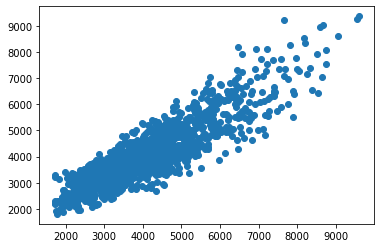

In [229]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
import math
print(math.sqrt(mse))
#mpg prediction
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['AgentBonus'], y_pred)

### Building Stats Model

In [270]:
df_new.columns

Index(['AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

In [271]:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

In [258]:
train.columns

Index(['Age', 'CustTenure', 'Channel', 'Occupation', 'EducationField',
       'Gender', 'ExistingProdType', 'Designation', 'NumberOfPolicy',
       'MaritalStatus', 'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure',
       'SumAssured', 'Zone', 'PaymentMethod', 'LastMonthCalls',
       'CustCareScore', 'AgentBonus'],
      dtype='object')

In [266]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3164 entries, 2461 to 235
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   3164 non-null   float64
 1   CustTenure            3164 non-null   float64
 2   Channel               3164 non-null   int8   
 3   Occupation            3164 non-null   int8   
 4   EducationField        3164 non-null   int8   
 5   Gender                3164 non-null   int8   
 6   ExistingProdType      3164 non-null   int64  
 7   Designation           3164 non-null   int8   
 8   NumberOfPolicy        3164 non-null   float64
 9   MaritalStatus         3164 non-null   int8   
 10  MonthlyIncome         3164 non-null   int32  
 11  Complaint             3164 non-null   int64  
 12  ExistingPolicyTenure  3164 non-null   float64
 13  SumAssured            3164 non-null   int32  
 14  Zone                  3164 non-null   int8   
 15  PaymentMethod      

In [272]:
f_1 = 'AgentBonus~Age+CustTenure+Channel+Occupation+EducationField+Gender+ExistingProdType+Designation+NumberOfPolicy+MaritalStatus+MonthlyIncome+Complaint+ExistingPolicyTenure+SumAssured+Zone+PaymentMethod+LastMonthCalls+CustCareScore'

In [268]:
import statsmodels.formula.api as SM

In [278]:
lm1 = SM.ols(formula = f_1, data= train).fit()
lm1.params

Intercept               107.145232
Age                      23.010129
CustTenure               21.753241
Channel                   7.244984
Occupation               -5.783684
EducationField           -2.196148
Gender                   16.794356
ExistingProdType        -19.364411
Designation             -11.694038
NumberOfPolicy            9.983658
MaritalStatus            -7.035412
MonthlyIncome             0.048074
Complaint                45.997019
ExistingPolicyTenure     14.828974
SumAssured                0.003527
Zone                      2.153595
PaymentMethod            -1.045846
LastMonthCalls            1.684750
CustCareScore            10.673785
dtype: float64

In [279]:
print(lm1.summary())  

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     698.3
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:54:50   Log-Likelihood:                -24878.
No. Observations:                3164   AIC:                         4.979e+04
Df Residuals:                    3145   BIC:                         4.991e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              107.1452 

### Matrics for Stats Model on Train and Test data

In [280]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [282]:
import math
math.sqrt(mse)

639.6170033404217

In [283]:
# Finding the model score i.e. coeff of determinant
regression_model.score(X_test, y_test)

0.7904320745078321

In [284]:
#mpg prediction
y_pred = regression_model.predict(X_test)

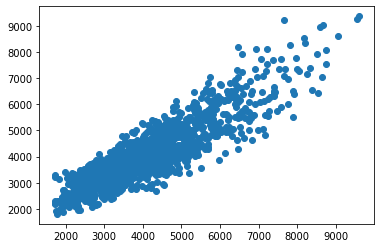

In [286]:
plt.scatter(y_test['AgentBonus'], y_pred)

### Iteration: 2

#### We can see Lot of Fields have P value as more than 0.05, so we need to iliminate them , before we go further.
#### Also to Notice, since we have lot of fields, we can not go and check for each single columns,
#### So lets check VIF in Loop and find the best features according to VIF
#### For this testing we will keep VIF thresold value as 5

In [288]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_vif = train.iloc[:,1:]
y = train['AgentBonus']

In [289]:
thres = 5

while True:
    Cols = range(x_vif.shape[1])
    
    vif = np.array([variance_inflation_factor(x_vif.values, i) for i in Cols])
    if all(vif < thres):
        break
    else:
        Cols = np.delete(Cols,np.argmax(vif))
        x_vif = x_vif.iloc[:,Cols]

In [290]:
len(x_vif.columns)

12

In [291]:
x_vif.columns

Index(['CustTenure', 'Channel', 'EducationField', 'Gender', 'Designation',
       'MaritalStatus', 'Complaint', 'ExistingPolicyTenure', 'Zone',
       'PaymentMethod', 'LastMonthCalls', 'CustCareScore'],
      dtype='object')

In [292]:
f_2 = 'AgentBonus~CustTenure+Channel+EducationField+Gender+Designation+MaritalStatus+Complaint+ExistingPolicyTenure+Zone+PaymentMethod+LastMonthCalls+CustCareScore'

In [293]:
lm2 = smf.ols(formula= f_2, data = data_train).fit()
lm2.params

Intercept               2320.596534
CustTenure                68.009938
Channel                   -2.897091
EducationField            15.706993
Gender                    -3.892326
Designation              156.543260
MaritalStatus            -53.183450
Complaint                 67.921353
ExistingPolicyTenure      73.602503
Zone                       1.571826
PaymentMethod             -4.978951
LastMonthCalls            27.684692
CustCareScore             20.610323
dtype: float64

In [294]:
print(lm2.summary()) 

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     186.9
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:00:33   Log-Likelihood:                -26573.
No. Observations:                3164   AIC:                         5.317e+04
Df Residuals:                    3151   BIC:                         5.325e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2320.5965 

In [295]:
#Concatenation of X and y into one DF
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,AgentBonus
2461,12.0,16.0,2,1,1,1,4,1,3.0,2,20742,1,4.0,480800,3,0,1,4.0,3941
3681,31.0,15.0,0,3,5,1,4,2,5.0,1,23398,0,4.0,617707,3,0,2,4.0,5148
1309,15.0,6.0,0,2,2,1,3,1,1.0,2,16232,0,6.0,453360,1,0,0,5.0,3084
4254,5.0,16.0,1,1,1,1,4,2,2.0,1,23536,0,1.0,282197,3,0,8,3.0,2589
1335,8.0,17.0,0,2,2,1,1,1,1.0,1,17269,0,6.0,750165,3,1,1,5.0,4145


In [296]:
data_test.head(10)

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,AgentBonus
610,11.0,23.0,2,2,2,1,3,2,2.0,2,22756,0,1.0,785082,3,0,4,2.0,5689
1519,20.0,7.0,0,3,5,0,3,4,1.0,1,34517,0,7.0,1200156,1,0,6,1.0,6558
1620,7.0,15.0,0,2,4,1,3,2,1.0,1,18697,0,4.0,430218,1,0,8,3.0,2431
2031,13.0,22.0,2,3,5,1,3,2,4.0,1,21385,1,4.0,884697,1,0,7,5.0,4491
494,12.0,14.0,0,3,5,1,3,1,3.0,0,17259,0,1.0,253707,3,0,0,2.0,2416
1011,11.0,22.0,0,2,2,1,3,0,3.0,2,21606,0,13.0,891320,3,0,0,3.0,5468
3818,15.0,10.0,0,3,5,1,4,1,2.0,1,20527,0,2.0,933979,1,0,5,1.0,5132
3970,31.0,25.0,0,3,0,1,5,0,4.0,1,32575,0,25.0,662250,3,3,1,3.0,6189
745,18.0,18.0,2,2,2,1,4,1,2.0,0,18867,1,1.0,502617,3,3,2,4.0,4528
3240,35.0,12.0,0,2,2,0,4,3,2.0,2,26402,1,15.0,993243,3,0,4,4.0,5808


In [298]:
# Calculation of MSE
mse = np.mean((lm1.predict(data_train.drop('AgentBonus',axis=1))-data_train['AgentBonus'])**2)
mse

395474.9060243344

In [299]:
#Root Mean Squared Error
np.sqrt(mse)

628.8679559528649

In [300]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(2320.6) * Intercept + (68.01) * CustTenure + (-2.9) * Channel + (15.71) * EducationField + (-3.89) * Gender + (156.54) * Designation + (-53.18) * MaritalStatus + (67.92) * Complaint + (73.6) * ExistingPolicyTenure + (1.57) * Zone + (-4.98) * PaymentMethod + (27.68) * LastMonthCalls + (20.61) * CustCareScore + 

In [305]:
vif = [variance_inflation_factor(x_vif.values, ix) for ix in range(x_vif.shape[1])]

In [307]:
i=0
for column in x_vif.columns:
    if i < len(x_vif.columns):
        print ('VIF for ',column ,"-->",  vif[i])
        i = i+1

VIF for  CustTenure --> 3.790033775141446
VIF for  Channel --> 1.3674071536626644
VIF for  EducationField --> 3.1006352234832213
VIF for  Gender --> 2.2832513143575848
VIF for  Designation --> 3.9930741083788313
VIF for  MaritalStatus --> 2.9749610038686054
VIF for  Complaint --> 1.372672626375024
VIF for  ExistingPolicyTenure --> 2.1602734201075835
VIF for  Zone --> 4.634615659950178
VIF for  PaymentMethod --> 1.5677314160353433
VIF for  LastMonthCalls --> 2.7251170659952284
VIF for  CustCareScore --> 4.777966551279207


### Compare these models and select the best one with appropriate reasoning.

## 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

**Overview:**

According to business study given, we are supposed to help the "Gem Stones co ltd" to predict the price for the cubic zirconia and apprehension on the different price ranges. We have been given the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. 

We have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. 
Also, provide them with the best 5 attributes that are most important.

**Business insights:**
- Cut have 5 different categories, of  ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']

- While finding the unique categorical value during the exploratory data analysis it was observed that the "ideal" cut had given best sell to the company with more than total price of "37,359,759" (37 Million) and Count of "Ideal"   Stones of 10816.

- Least Sell came from "Fair" Stones and it also have least number of Stones of 781.

- In terms of the colors, G and H, are giving best Sell, whereas maximum Stones also came from Color G 

- Very less Stones from Color I, Sell for color J Stones with least total Price but at the same time, J has the Costliest Stone among all with Mean price of  5331.45.

- Similarly, the clarity levels SI2, VS2, SI1 were the most profitable among all. And  SI2 turned out to be the costliest in terms of price. and VVS1 is the cheapest Stone of price of 2502.87.

- There is very Strong co-relation between X,Y and Z with price, or we can say all are related to each other. which seems True as well, as X, Y and Z are denoting to the Dimension of the Stone. So the Bigger the Stone is, Precius it will be and Costly it will be.

- Equation For the prediction of the Prices based on Parameters determined is as follows :

(6748.11) * Intercept + (11552.81) * carat + (-106.05) * depth + (-40.29) * table + (-1163.61) * x + (167.14) * cut_Ideal + (97.92) * cut_Premium + (-183.5) * color_E + (-262.97) * color_F + (-440.82) * color_G + (-956.9) * color_H + (-1452.79) * color_I + (-2350.8) * color_J + (5293.35) * clarity_IF + (3689.96) * clarity_SI1 + (2694.08) * clarity_SI2 + (4579.2) * clarity_VS1 + (4286.67) * clarity_VS2 + (4999.8) * clarity_VVS1 + (4929.64) * clarity_VVS2 + 

Total number of Observationsused in the data set is  18870   
Df Model:                          19 , which means, 19 fields were used for the model predictions.


**Business Recommendations:**

- In terms of Cut, the customer preference and sale goes with ideal, premium, and very good cuts. Hence, these highly selling products will be the prime focus in the marketing campaigns.

- The marketing ads can be broadcasted by focusing on the cut perfection, customer acceptance, quality, and pricing.

- Talking about the best 5 attributes that are most important: Cut, Carat, X (Lenth of the stone), clarity are most important attributes of the data to predict the price. as well as same should be used as Focused point for the sell of the Stones.